# Exercise: Classification and Clustering with MNIST dataset

## Introduction 

You'll be working with the MNIST digits recognition dataset, which has 10 classes, the digits 0 through 9! A reduced version of the MNIST dataset is one of scikit-learn's included datasets, and that is the one we will use in this exercise.

Each sample in this scikit-learn dataset is an 8x8 image representing a handwritten digit. Each pixel is represented by an integer in the range 0 to 16, indicating varying levels of black. Recall that scikit-learn's built-in datasets are of type Bunch, which are dictionary-like objects. Helpfully for the MNIST dataset, scikit-learn provides an 'images' key in addition to the 'data' and 'target' keys that you have seen with the Iris data. Because it is a 2D array of the images corresponding to each sample, this 'images' key is useful for visualizing the images, as you'll see in this exercise. On the other hand, the 'data' key contains the feature array - that is, the images as a flattened array of 64 pixels.


## Exercise 1
Follow the instructions to implement the following codes
* Import `datasets` from `sklearn` and `matplotlib.pyplot` as `plt`.

* Load the digits dataset using the `.load_digits()` method on `datasets`.
 
* Print the keys and `DESCR` of digits.

* Print the shape of `images` and `data` keys using the `.` notation.

* Display the 1011th image using `plt.imshow()`. This has been done for you.


In [3]:
# Import necessary modules
from sklearn import datasets;
from matplotlib import pyplot as plt;


# Load the digits dataset: digits
digits = datasets.load_digits()

# Print the keys and DESCR of the dataset
print(digits.keys())
print(digits['DESCR'])

# Print the shape of the images and data keys
print(digits['images'].shape)
print(digits['data'].shape)

# Display digit 1010
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping b

<Figure size 640x480 with 1 Axes>

## Exercise 2
Follow the instructions to implement the following codes
* Import `KNeighborsClassifier` from `sklearn.neighbors` and `train_test_split` from `sklearn.model_selection`.

* Create an array for the features using `digits.data` and an array for the target using `digits.target`.

* Create stratified training and test sets using `0.2` for the size of the test set. Use a random state of `42`. Stratify the split according to the labels so that they are distributed in the training and test sets as they are in the original dataset.
 
* Create a k-NN classifier with `7` neighbors and fit it to the training data.

* Compute and print the accuracy of the classifier's predictions using the .score() method.

In [4]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Create feature and target arrays
X = digits['data']
y = digits['target']

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(7)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))


0.9833333333333333


## Exercise 3
Follow the instructions to implement the following codes

* Inside the for loop:
  * Setup a k-NN classifier with the number of neighbors equal to `k`.
  * Fit the classifier with `k` neighbors to the training data.
  * Compute accuracy scores the training set and test set separately using the `.score()` method and assign the results to the `train_accuracy` and `test_accuracy` arrays respectively.

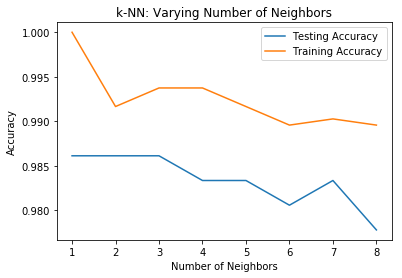

In [6]:
import numpy as np
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()


## Exercise 4
Follow the instructions to implement the following codes
* Import `GridSearchCV` from `sklearn.model_selection`/ 

* Setup kNN and the hyperparameter grid in range (1,25).

* Use `GridSearchCV` with 5-fold and fit it to the training data.

* Print the best parameter and the best score obtained from `GridSearchCV` by accessing the `best_params_` and `best_score_`.


In [9]:
# Import necessary modules
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()
    
# Setup the hyperparameter grid
param_grid = {'n_neighbors': np.arange(1, 25)}

# Setup Gridsearch and fit to data
g = GridSearchCV(knn, param_grid)
g.fit(X_train,y_train)
print(g.best_params_)
print(g.best_score_)

# Print the best parameter and best score.

/anaconda3/envs/myenv/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'n_neighbors': 1}
0.9860821155184412


## Exercise 5 

* Apply logistic regression, SVM and Decision Tree to the training dataset.
* For each classifier, print out the training and validation accuracy.

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
all_models = [KNeighborsClassifier(), LogisticRegression(),DecisionTreeClassifier(),SVC()]
for a in all_models:
    a.fit(X_train, y_train)
    print(type(a))
    print(a.score(X_train, y_train))
    print(a.score(X_test, y_test))

<class 'sklearn.neighbors.classification.KNeighborsClassifier'>


0.9916492693110647
0.9833333333333333


/anaconda3/envs/myenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/myenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


<class 'sklearn.linear_model.logistic.LogisticRegression'>
0.9965205288796103
0.9611111111111111
<class 'sklearn.tree.tree.DecisionTreeClassifier'>
1.0
0.8166666666666667


/anaconda3/envs/myenv/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


<class 'sklearn.svm.classes.SVC'>
1.0


0.6444444444444445


## Exercise 6 
Modify the code [this link](http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html) to visualize decision boundaries of four classifier types: k-NN, SVM, Logistic Regression, Decision Tree 

(1437, 64)


/anaconda3/envs/myenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/myenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/envs/myenv/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


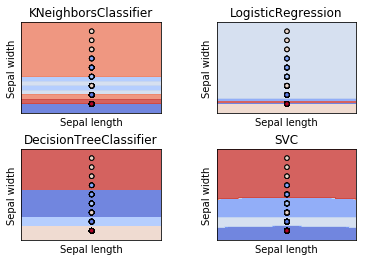

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

print(X_train.shape)

X_train_2d = X_train[:,:2]
y_train_2d = y_train


all_models = [KNeighborsClassifier(), LogisticRegression(),DecisionTreeClassifier(),SVC()]
titles = ["KNeighborsClassifier", "LogisticRegression","DecisionTreeClassifier","SVC"]
for a in all_models:
    a.fit(X_train_2d, y_train_2d)

fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)
X0, X1 = X_train_2d[:, 0], X_train_2d[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(all_models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

## Exercise 7 
Assume we do not know the labels of the dataset. In this exercise we use k-Means to cluster the dataset with `k=10`. Follow the instructions to implement the following codes

* Import KMeans from `sklearn.cluster`.
* Using `KMeans()`, create a KMeans instance called model to find 10 clusters. To specify the number of clusters, use the `n_clusters'` keyword argument.
* Use the `.fit()` method of model to fit the model to the array of points points.
* Use the `.predict()` method of model to predict the cluster labels of new_points, assigning the result to labels.

In [29]:
# Import KMeans
from sklearn.cluster import KMeans

# Create a KMeans instance with 3 clusters: model
model = KMeans(n_clusters=10)

# Fit model to points
model.fit(X_train, y_train)

# Determine the cluster labels of new_points: labels
labels = model.predict(X_test)

# Print cluster labels of new_points
print(labels)


[3 7 4 4 8 7 1 7 1 2 5 2 9 0 6 6 7 6 9 0 1 8 3 4 7 3 1 5 0 6 1 8 4 1 1 1 4
 3 5 3 4 8 3 1 2 8 2 7 8 2 5 4 2 2 0 7 6 5 5 5 8 3 1 4 0 8 1 3 8 5 3 5 0 3
 7 3 8 7 0 2 9 0 7 8 3 1 4 9 5 4 7 3 6 4 7 7 8 4 6 7 1 3 0 8 0 3 1 9 9 5 9
 7 4 1 0 6 4 8 7 5 5 9 1 2 4 7 4 4 3 5 5 4 1 6 0 3 0 0 0 0 6 8 5 5 4 9 3 4
 7 3 5 1 1 1 1 9 4 8 1 8 8 4 8 0 1 2 3 5 0 4 5 3 4 4 3 2 3 2 2 3 3 8 3 9 3
 2 6 8 0 5 8 3 8 8 2 4 2 4 0 6 2 6 3 7 2 2 9 4 0 3 3 3 0 1 9 5 4 6 5 2 2 1
 1 4 6 0 4 6 2 5 8 9 7 4 6 4 6 7 6 5 5 5 7 1 8 5 6 2 7 7 3 5 6 1 7 7 0 3 7
 0 5 1 3 8 9 6 6 4 7 1 0 3 4 7 2 8 2 0 7 5 0 6 4 3 8 3 1 0 8 7 1 9 6 8 7 3
 4 0 5 3 0 6 9 3 0 3 6 4 6 9 6 4 2 5 8 4 6 7 0 4 6 4 7 5 1 4 6 6 2 8 2 5 0
 7 7 6 7 8 8 4 8 1 0 4 9 3 4 4 4 1 8 7 8 4 3 6 7 5 0 6]


## Exercise 8 

 Compare the clusters in exercise 7 to the labels by using a cross-tabulation `pd.crosstab()`.

In [30]:
import pandas as pd
pd.crosstab(index=labels, columns= y_test)

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>col_0</th>
      <th>0</th>
      <th>1</th>
      <th>2</th>
      <th>3</th>
      <th>4</th>
      <th>5</th>
      <th>6</th>
      <th>7</th>
      <th>8</th>
      <th>9</th>
    </tr>
    <tr>
      <th>row_0</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>35</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>1</td>
    </tr>
    <tr>
      <th>1</th>
      <td>0</td>
      <td>1</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>34</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>2</th>
      <td>0</td>
      <td>1</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>25</td>
      <td>0</td>
      <td>0</td>
      <td>2</td>
      <td>0</td>
    </tr>
    <tr>
      <th>3</th>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>1</td>
      <td>0</td>
      <td>11</td>
      <td>0</td>
      <td>0</td>
      <td>7</td>
      <td>25</td>
    </tr>
    <tr>
      <th>4</th>
      <td>0</td>
      <td>18</td>
      <td>1</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>2</td>
      <td>3</td>
      <td>24</td>
      <td>1</td>
    </tr>
    <tr>
      <th>5</th>
      <td>35</td>
      <td>0</td>
      <td>1</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>6</th>
      <td>1</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>34</td>
      <td>1</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>7</th>
      <td>0</td>
      <td>6</td>
      <td>32</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>1</td>
      <td>0</td>
    </tr>
    <tr>
      <th>8</th>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>1</td>
      <td>1</td>
      <td>0</td>
      <td>0</td>
      <td>33</td>
      <td>1</td>
      <td>2</td>
    </tr>
    <tr>
      <th>9</th>
      <td>0</td>
      <td>10</td>
      <td>1</td>
      <td>0</td>
      <td>1</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>7</td>
    </tr>
  </tbody>
</table>
</div>